In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Now we will load the dataset and look at some initial rows and datatypes of the columns
data = pd.read_csv('AirPassengers.csv')

In [3]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
print("data Shape",data.shape)
print("data types",data.dtypes)

data Shape (144, 2)
data types Month         object
Passengers     int64
dtype: object


In [5]:
#The data contains a particular month and number of passengers travelling in that month.
#In order to read that data as a time series, we have to pass special arguments to the read_csv commnad

dataparse=lambda dates: pd.datetime.strptime(dates,'%Y-%m')
data= pd.read_csv('Airpassengers.csv', parse_dates=['Month'],index_col='Month',date_parser=dataparse)
print('\n Parsed data:')
print(data.head())


 Parsed data:
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


C:\Users\Pranjal\AppData\Local\Temp/ipykernel_16024/950056528.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dataparse=lambda dates: pd.datetime.strptime(dates,'%Y-%m')


In [6]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [8]:
ts=data['Passengers']

In [9]:
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [10]:
ts['1949-03-01']

132

In [11]:
ts[:'1949-12-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: Passengers, dtype: int64

In [12]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: Passengers, dtype: int64

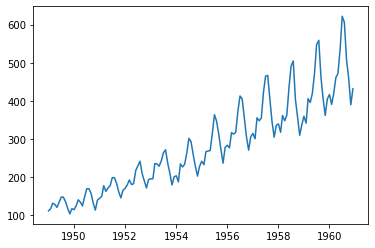

In [13]:
plt.plot(ts)

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12) #depricated
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    #rolstd= pd.rolling_std(timeseries, window=12) #depricated
    rolstd = pd.Series(timeseries).rolling(12).std()
    
    #plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #perform Dickey-fuller test:
    print ('result of Dickey-Fuller test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observation used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value
    print(dfoutput)
    

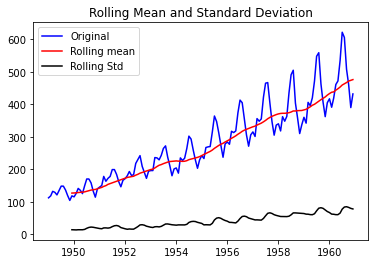

result of Dickey-Fuller test
Test Statistic                  0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of Observation used    130.000000
Critical Value(1%)             -3.481682
Critical Value(5%)             -2.884042
Critical Value(10%)            -2.578770
dtype: float64


In [16]:
test_stationarity(ts)

### Estimating and Eliminating Trends

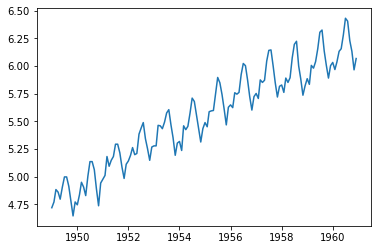

In [17]:
tslog=np.log(ts)
plt.plot(tslog)

In [18]:
#Aggregation
#Smoothing 
#Polynomial Fitting


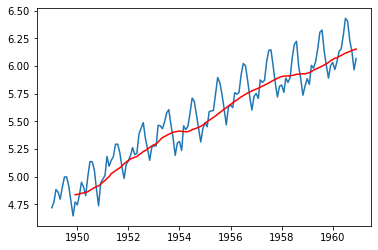

In [19]:
#Smoothing
## Moving Average
Moving_avg=pd.Series(tslog).rolling(12).mean()
plt.plot(tslog)
plt.plot(Moving_avg, color='red')

In [20]:
ts_log_moving_average = tslog-Moving_avg
ts_log_moving_average.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: Passengers, dtype: float64

In [21]:
ts_log_moving_average.dropna(inplace=True)

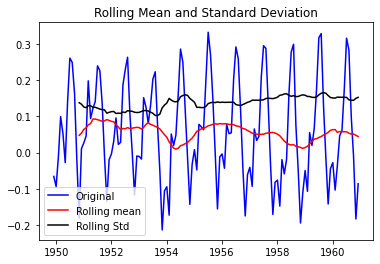

result of Dickey-Fuller test
Test Statistic                 -3.162908
p-value                         0.022235
#Lags Used                     13.000000
Number of Observation used    119.000000
Critical Value(1%)             -3.486535
Critical Value(5%)             -2.886151
Critical Value(10%)            -2.579896
dtype: float64


In [22]:
test_stationarity(ts_log_moving_average)

ValueError: setting an array element with a sequence.

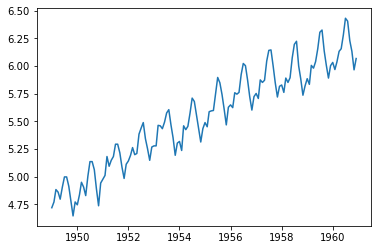

In [23]:
expwighted_avg = pd.DataFrame.ewm(tslog, halflife=12)
plt.plot(tslog)
plt.plot(expwighted_avg, color='red')

### Eliminating trend and Seasonality

In [24]:
ts_log_diff_sess = tslog-tslog.shift()

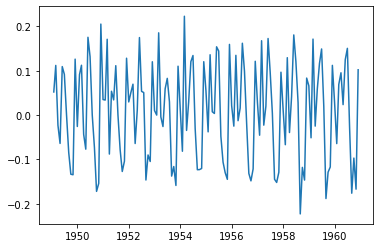

In [25]:
plt.plot(ts_log_diff_sess)

In [26]:
ts_log_diff_sess.dropna(inplace=True)

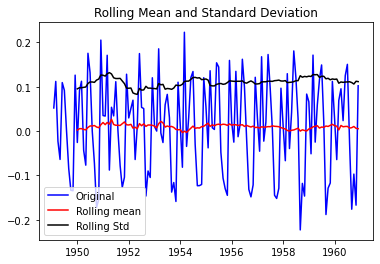

result of Dickey-Fuller test
Test Statistic                 -2.717131
p-value                         0.071121
#Lags Used                     14.000000
Number of Observation used    128.000000
Critical Value(1%)             -3.482501
Critical Value(5%)             -2.884398
Critical Value(10%)            -2.578960
dtype: float64


In [27]:
test_stationarity(ts_log_diff_sess)

### Decomposition

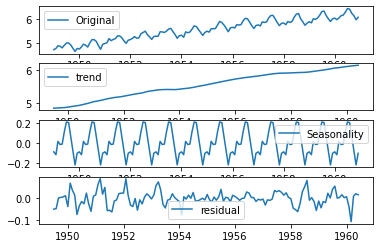

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(tslog)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid


plt.subplot(411)
plt.plot(tslog, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')

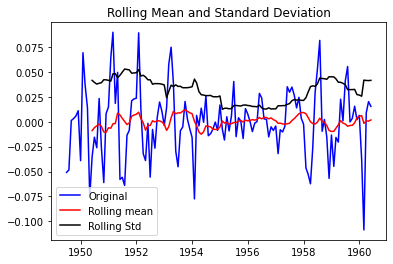

result of Dickey-Fuller test
Test Statistic               -6.332387e+00
p-value                       2.885059e-08
#Lags Used                    9.000000e+00
Number of Observation used    1.220000e+02
Critical Value(1%)           -3.485122e+00
Critical Value(5%)           -2.885538e+00
Critical Value(10%)          -2.579569e+00
dtype: float64


In [29]:
tslogresidual= residual
tslogresidual.dropna(inplace=True)
test_stationarity(tslogresidual)

In [30]:
#ACF and PACF
from statsmodels.tsa.stattools import acf,pacf

In [31]:
lag_acf=acf(ts_log_diff_sess,nlags=20)
lag_pacf=pacf(ts_log_diff_sess,nlags=20,method='ols')

C:\Users\Pranjal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Autocorrelation Function')

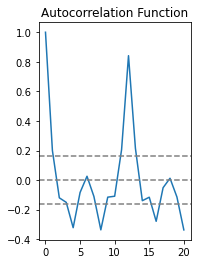

In [32]:
#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff_sess)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff_sess)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

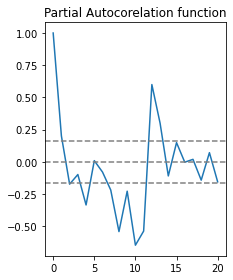

In [33]:
#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff_sess)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff_sess)),linestyle='--',color='gray')
plt.title('Partial Autocorelation function')
plt.tight_layout()

In [34]:
#We need to load the ARIMA model first
from statsmodels.tsa.arima_model import ARIMA
#AR MODEL

C:\Users\Pranjal\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Pranjal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M

Text(0.5, 1.0, 'RSS: 1.5023')

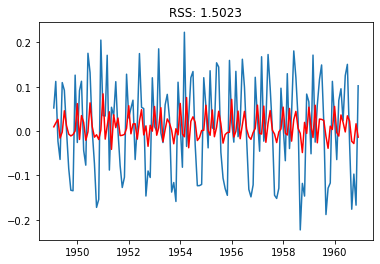

In [35]:
model= ARIMA(tslog,order=(2,1,0))
results_AR=model.fit(disp=-1)
plt.plot(ts_log_diff_sess)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff_sess)**2))

C:\Users\Pranjal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pranjal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 1.4721')

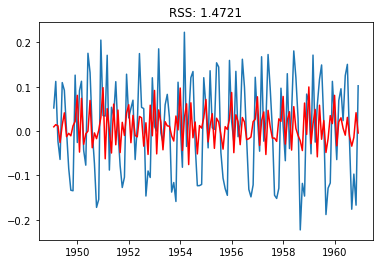

In [36]:
#MA MODEL
model=ARIMA(tslog,order=(0,1,2))
results_MA=model.fit(disp=-1)
plt.plot(ts_log_diff_sess)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff_sess)**2))

C:\Users\Pranjal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pranjal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 1.0292')

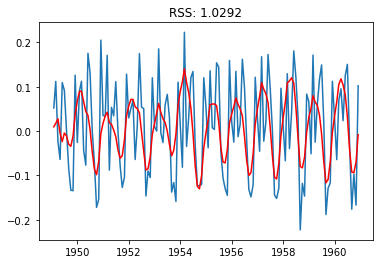

In [37]:
#Combined Model
model=ARIMA(tslog,order=(2,1,2))
Results_ARIMA=model.fit(disp=-1)
plt.plot(ts_log_diff_sess)
plt.plot(Results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((Results_ARIMA.fittedvalues-ts_log_diff_sess)**2))

In [38]:
#Taking it back to original scale

In [39]:
prediction_ARIMA_diff=pd.Series(Results_ARIMA.fittedvalues,copy=True)
print(prediction_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [40]:
prediction_ARIMA_diff_cumsum=prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [41]:
predictions_ARIMA_log = pd.Series(tslog.iloc[0], index=tslog.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(prediction_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5, 1.0, 'RMSE: 90.1043')

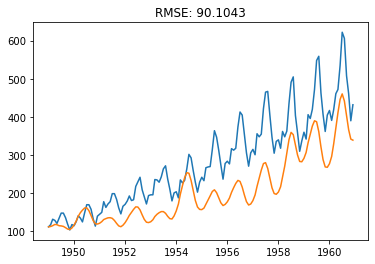

In [42]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))